## Main Goal
The goal is to develop a dynamic pricing model that optimizes the prices of items to maximize revenue while remaining competitive in the market.  

**This involves:**

1. Analyzing the current pricing strategy and its impact on sales and revenue.
2. Comparing our pricing strategy with that of the competition to identify gaps and opportunities.
3. Developing a dynamic pricing model that adjusts prices based on factors such as competitor pricing, demand elasticity, and market trends.
4. Implementing and simulating the dynamic pricing model to compare its performance against the existing pricing strategy.

### Data Understanding
The given dataset contains pricing information for various items sold at a retail store and their corresponding prices at competing stores. The dataset includes the following columns:

1. **Fiscal_Week_Id**: The fiscal week identifier.
2. **Store_Id**: The store identifier.
3. **Item_Id**: The item identifier.
4. **Price**: The price of the item at our store.
5. **Item_Quantity**: The quantity of the item sold.
6. **Sales_Amount_No_Discount**: Sales amount without discount.
7. **Sales_Amount**: Sales amount after discounts.
8. **Competition_Price**: The price of the item at a competing store.

Key here is to unravel how our pricing strategies have influenced sales and revenue historically, and how competitor prices impact our performance. Considering factors like discounts and temporal aspects (thanks to the Fiscal_Week_Id) will help in identifying patterns and trends essential for optimizing prices. The ultimate goal is to find that sweet spot where price adjustments maximize revenue without sacrificing competitiveness.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/Competition_Data.csv")

In [3]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [5]:
dataset.shape

(100000, 9)

In [6]:
dataset.isnull().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

In [7]:
dataset.isna().sum()

Index                       0
Fiscal_Week_ID              0
Store_ID                    0
Item_ID                     0
Price                       0
Item_Quantity               0
Sales_Amount_No_Discount    0
Sales_Amount                0
Competition_Price           0
dtype: int64

### Basic EDA 
#### How does our item pricing correlate with the quantity sold?

In [8]:
# Calculate the overall correlation
correlation = dataset['Price'].corr(dataset['Item_Quantity'])
print(f'Overall Correlation between Price and Quantity Sold: {correlation}')

Overall Correlation between Price and Quantity Sold: -0.17640332559077712


#### What is the relationship between our prices and competitor prices, and how does this difference affect our sales volumes?

In [9]:
# Mean, Median, and Standard Deviation for our prices
our_price_stats = dataset['Price'].describe()

# Mean, Median, and Standard Deviation for competitor prices
competitor_price_stats = dataset['Competition_Price'].describe()

print("Our Price Stats:\n", our_price_stats)
print("\nCompetitor Price Stats:\n", competitor_price_stats)

Our Price Stats:
 count    100000.000000
mean        167.017783
std          69.503418
min          47.700000
25%         105.410000
50%         159.420000
75%         221.900000
max         310.660000
Name: Price, dtype: float64

Competitor Price Stats:
 count    100000.000000
mean        174.280887
std          71.545584
min          47.950000
25%         118.627500
50%         162.510000
75%         237.335000
max         313.640000
Name: Competition_Price, dtype: float64


Our prices have a mean of 167.02, slightly lower than the competitor mean of 174.28. The standard deviation for our prices is 69.50, indicating a slightly narrower range of prices compared to the competitor standard deviation of 71.55!  
The median price (50th percentile) is also lower for our prices at 159.42, compared to the competitor's median of 162.51!  
Lastly, our maximum price is 310.66, slightly below the competitor maximum price of 313.64!  
> This comparison shows that, on average, our prices tend to be slightly lower than those of our competitors, and there is less variability in our pricing as reflected by the standard deviation!

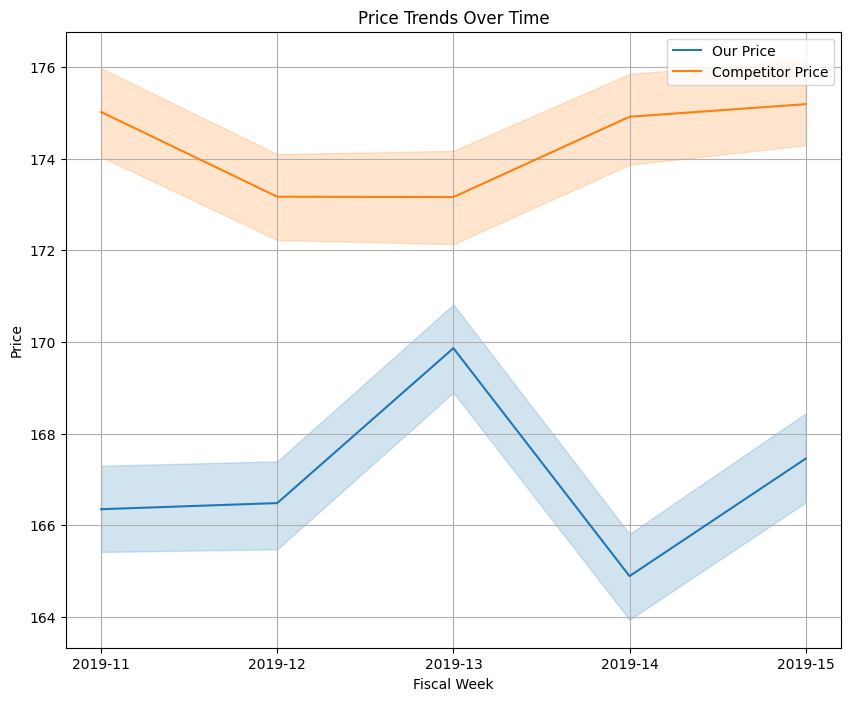

In [10]:
# Plotting the Price and The Competitor Price Trends Over Time
plt.figure(figsize=(10, 8))
sns.lineplot(data=dataset, x='Fiscal_Week_ID', y='Price', label='Our Price')
sns.lineplot(data=dataset, x='Fiscal_Week_ID', y='Competition_Price', label='Competitor Price')
plt.title('Price Trends Over Time')
plt.xlabel('Fiscal Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

> The competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, our store’s prices start around 166, increase slightly, then dip before rising again. It indicates that the competition follows a more stable pricing strategy, while our store experiences more fluctuations in pricing. The stability in the competition’s pricing could be contributing to their higher and more consistent sales performance.

#### Are there identifiable trends or patterns in sales quantities over different fiscal weeks, indicating seasonality or temporal effects?

In [11]:
# Group by Fiscal_Week_Id and sum Item_Quantity
weekly_sales = dataset.groupby('Fiscal_Week_ID')['Item_Quantity'].sum().reset_index()

# Display the result
print(weekly_sales)

  Fiscal_Week_ID  Item_Quantity
0        2019-11        7839663
1        2019-12        8254376
2        2019-13        7943760
3        2019-14        7836817
4        2019-15        8086516


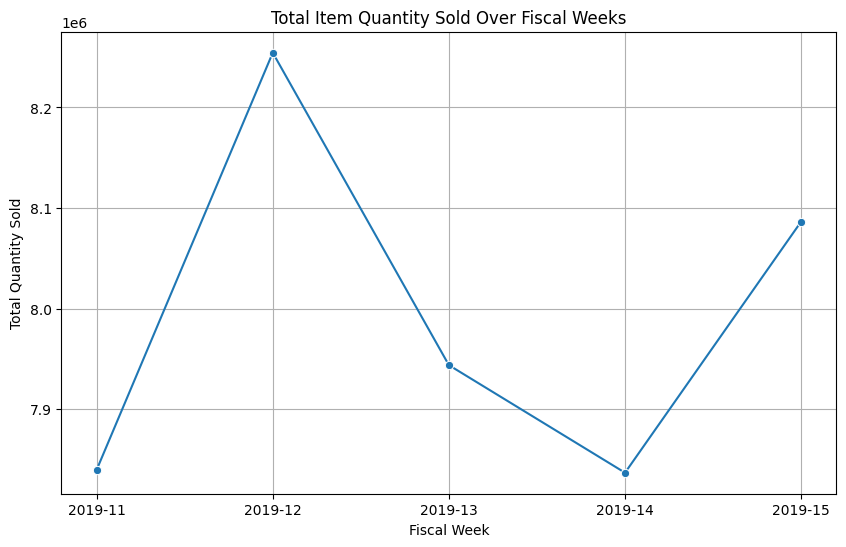

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_sales, x='Fiscal_Week_ID', y='Item_Quantity', marker='o')
plt.title('Total Item Quantity Sold Over Fiscal Weeks')
plt.xlabel('Fiscal Week')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

> It decreases after the first week and continues goes down through the third week and then increases after the fourth week!  

#### How changes in prices affect the change in quantity sold?
Ed = % change in quantity demanded / % change in price  
(Elasticity of demand) = How much the quantity sold changes in percentage terms / How much the price changes in percentage terms

In [13]:
dataset['price_change'] = dataset['Price'].pct_change()
# This line calculates the fractional change in the Price column for each row compared to the previous row.
dataset['qty_change'] = dataset['Item_Quantity'].pct_change()
# This line calculates the fractional change in the Item_Quantity column for each row compared to the previous row.
# Computes the fractional change from the immediately previous row by default. This is useful in comparing the fraction of change in a time series of elements.

In [14]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44,NaN,NaN
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01,0.0,0.0
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03,0.0,0.0
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66,0.0,0.0
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32,0.0,0.0


In [15]:
# Calculate elasticity using the formula Ed = % change in quantity demanded / % change in price
# This line calculates the price elasticity of demand for each row by dividing the fractional change in quantity sold by the fractional change in price.
dataset['elasticity'] = dataset['qty_change'] / dataset['price_change']

# Replace infinite values with NaN (e.g., when price_change is zero, pct_change can result in inf)
dataset.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop rows where elasticity is NaN
dataset.dropna(subset=['elasticity'], inplace=True)

In [16]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity
10,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147
20,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520
30,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086
40,40,2019-11,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389
50,50,2019-11,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661


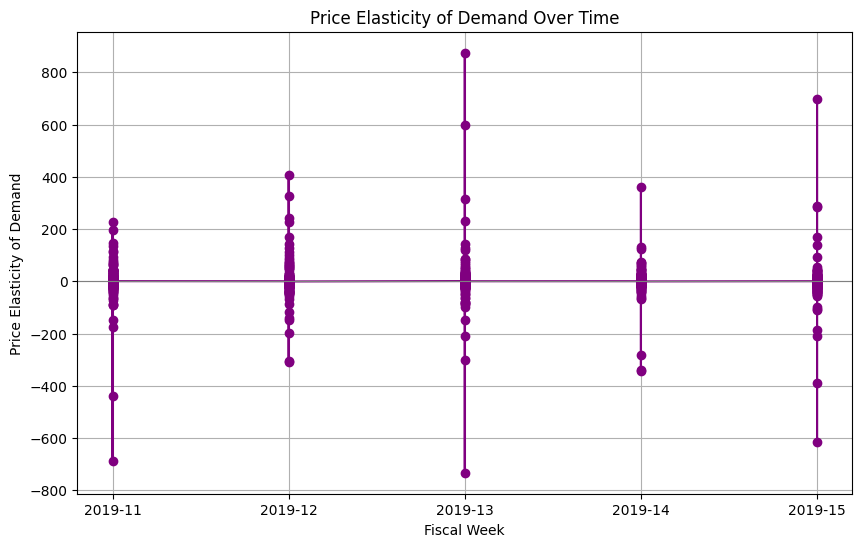

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(dataset['Fiscal_Week_ID'], dataset['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

> It highlights significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive.  
High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicates a sharp drop in demand with price hikes.  
The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

#### Compare the total sales amounts between our store and the competitions
>(For the competitions we assume they have sold as many products as our store!)

In [18]:
total_sales_our_store = dataset['Sales_Amount'].sum()
total_sales_competitor = (dataset['Competition_Price'] * dataset['Item_Quantity']).sum()

In [19]:
total_quantity_our_store = dataset['Item_Quantity'].sum()
total_quantity_competitor = total_quantity_our_store # Assuming the competitor sells the same quantity as us

In [20]:
summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Our Store': [total_sales_our_store, total_quantity_our_store],
    'Competition': [total_sales_competitor, total_quantity_competitor]
})
summary

,Metric,Our Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


> Our store’s total sales amount is 114,100,500, whereas the competition’s total sales amount is 696,209,700 (assuming equal quantity sold).  
The competition has a significantly higher total sales amount compared to our store. It indicates that their pricing strategy is more effective in generating revenue.

#### How the sales amounts vary across different price brackets?
(to identify if there are specific price ranges where the competition outperforms our store)

#### 

In [21]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
dataset['price_bracket'] = pd.cut(dataset['Price'], bins=bins, labels=labels, right=False)
dataset['competition_price_bracket'] = pd.cut(dataset['Competition_Price'], bins=bins, labels=labels, right=False)

In [22]:
dataset.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket
10,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250
20,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250
30,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250
40,40,2019-11,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250
50,50,2019-11,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250


In [23]:
# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = dataset.groupby('price_bracket', observed=False)['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

In [24]:
# calculate sales amount by price bracket for competition
dataset['competition_sales_amt'] = dataset['Competition_Price'] * dataset['Item_Quantity']
sales_by_bracket_competition = dataset.groupby('competition_price_bracket', observed=False)['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

In [25]:
sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


> The competition has significantly higher sales in bracket 0, bracket 1, bracket 2, ....!

### Price Optimization with dynamic pricing
1. We will enhance our dataset to include segments and calculate price elasticity for each segment.
2. We’ll create segments based on purchasing behaviour and calculate price elasticity for each segment.
3. We’ll define dynamic pricing rules based on competitor pricing, demand, and elasticity.
4. We’ll simulate the dynamic pricing model and compare it with the existing pricing strategy.

##### Segment customers based on purchasing behaviour

In [26]:
item_summary = dataset.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum',
}).reset_index()

In [29]:
# merge the item summary back to the main dataset
dataset = pd.merge(dataset, item_summary, on='Item_ID', suffixes=('', '_avg'))

In [31]:
dataset.head(3)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg
0,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792
1,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792
2,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792


In [32]:
# define segments based on average price
dataset['segment'] = pd.cut(dataset['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

In [33]:
dataset.head(3)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment
0,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium
1,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium
2,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium


##### Calculating price elasticity for each segment

In [36]:
segments = dataset['segment'].unique()
# 'Low' < 'Medium' < 'High'
elasticity_data = []

In [ ]:
for segment in segments:
    segment_data = dataset[dataset['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'Segment': segment, 'Average Elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

In [39]:
elasticity_df

,Segment,Average Elasticity
0,Medium,0.154444
1,High,0.148043


> The “High” segment has an average elasticity of 0.143993, indicating that these customers are more sensitive to price changes.  
In contrast, the “Medium” segment has a lower average elasticity of 0.071118, suggesting they are less responsive to price variations.


1. we calculated the average price and total quantity sold for each item and merged this summary back into the main dataset. 
2. We then defined segments based on the average price of each item.
3. We calculated the price elasticity of demand for each segment by dividing the fractional change in quantity sold by the fractional change in price.
4. We then defined customer segments based on these average prices into three categories: Low, Medium, and High.
5. For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold. 
6. Finally, we computed the average elasticity for each segment, which provides insights into how sensitive each segment is to price changes.

Based on the elasticity, we can define the following dynamic pricing rules:

1. **Medium Segment (Inelastic Demand)**: Small changes in price won’t significantly affect demand. We can **slightly increase prices** to maximize revenue without losing much in sales volume.
2. **High Segment (Elastic Demand)**: Demand is sensitive to price changes. We should **optimize prices to find the sweet spot** that maximizes revenue without losing sales volume.

In [40]:
# create a copy of the dataset for simulation
dynamic_pricing_data = dataset.copy()

In [42]:
# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.1
# increasing prices by 5% for the Medium segment!
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90
# decreasing prices by 10% for the High segment!

In [43]:
dynamic_pricing_data.head(2)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,150.469
1,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,152.537


In [44]:
# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

In [46]:
# compare total sales amount between before and after applying dynamic pricing
total_sales_before = dataset['Sales_Amount'].sum()
total_sales_after = dynamic_pricing_data['dynamic_sales_amt'].sum()

In [47]:
# compare total quantity sold between before and after applying dynamic pricing
total_quantity_before = dataset['Item_Quantity'].sum()
total_quantity_after = dynamic_pricing_data['Item_Quantity'].sum()

In [48]:
comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_before, total_quantity_before],
    'Dynamic Pricing': [total_sales_before, total_quantity_after]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,1.141005e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


> The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue!

##### Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices.